# Seaborn

[seaborn](https://github.com/mwaskom/seaborn)是一个基于matplotlib的python可视化库。提供了绘制统计图形的高级接口。也是一个使用者很多的可视化库。

## 安装

需要的库有：

- numpy
- scipy
- pandas
- matplotlib
- statsmodels

所以以上库都安装下。

```bash
python -m pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose

conda install statsmodels
```

然后安装seaborn

```bash
pip install seaborn
```

## 简介

文档参考：[seaborn: statistical data visualization](https://seaborn.pydata.org/)

seaborn和pandas也结合的很好，基于matplotlib绘制。主要功能有：

- 检验多变量之间的关系
- 对类别变量统计的特别支持
- 单变量和二元变量的可视化，以及数据集内比较它们
- 线性回归模型可视化
- 复杂数据集整体结构可视化
- 复杂多图的高级抽象
- 内置主题轻松配置图形
- 调色板工具

接下来通过一个小示例，看看seaborn的基本使用方法。

In [5]:
# Pandas for managing datasets
import pandas as pd

In [6]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

seaborn使用matplotlib库，因此在jupyter中，注意在运行seaborn代码前，要先让matplotlib可显示。另外因为是绘制各类统计图，所以pandas也是常客。

接下来就是第一步，首先导入seaborn，通常以sns的名称导入。

In [7]:
# Seaborn for plotting and styling
import seaborn as sns

接下来就是通过set函数设置一些样式，如果set没有参数，那就是直接使用默认的theme，scaling和color palette。seaborn默认的这些设置都是建立在 matplotlib rcParam system 基础上的。

除了默认的，还有一些选项可以选择，可参考：[several other options](http://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial)。

Seaborn将matplotlib参数分成两个独立的groups。一个是绘图的美术风格，第二个是scale图形不同的元素的。

对应的，操作这两个group参数的也是两组函数。控制style的有：axes_style() and set_style() 函数。控制scale的：plotting_context() and set_context() 函数。

seaborn里有一些设置好的themes，包括：darkgrid, whitegrid, dark, white, and ticks。默认的是darkgrid。

除了这些风格之外，seaborn还允许用户定制styles，通过向axes_style() and set_style()的rc 传递参数，可以重写一些风格设置参数。具体有哪些参数可以调用如下命令得到，然后通过类似“sns.set_style("darkgrid", {"axes.facecolor": ".9"})”的代码即可实现定制化。

In [4]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

关于scaling plot elements，也有一个参数集来控制，这个参数集可以配置。有四个默认的contexts：paper, notebook, talk, and poster.  其中，notebook是默认的。通过“sns.set_context("paper")”代码可以配置。当然也可以通过类似上面的方式类配置具体的参数：
```python
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
```

紧接着第三步，就是加载数据了，如下所示是使用的load_dataset函数，这是个调用官方示例数据集的函数，它们都是pandas的dataframe。这里先看看这个示例数据集是什么样的，然后才能理解接下来的replot函数，以及如何绘制自己给出的数据集。

seaborn的数据集是有特定的格式的，主要是两种，一个是“long-form”，一个是“tidy”，关于这两个数据类型是什么意思可以参考这个[academic paper](http://vita.had.co.nz/papers/tidy-data.html)，这个文件也不大，所以放到该文件夹下了，如果需要翻译，可以参考：[数据整理（Tidy Data）—翻译Hadley Wickham的一篇论文](https://zhuanlan.zhihu.com/p/27579776) 或者这个：[Tidy data（整理数据）---Hadley Wickham](https://zhuanlan.zhihu.com/p/28642908)

这里简单总结下，“整齐的数据”就是每个变量是一列，每组观测是一行，并且每类观测的unit 是一个table. 

最后一步就是调用绘制函数，这个函数

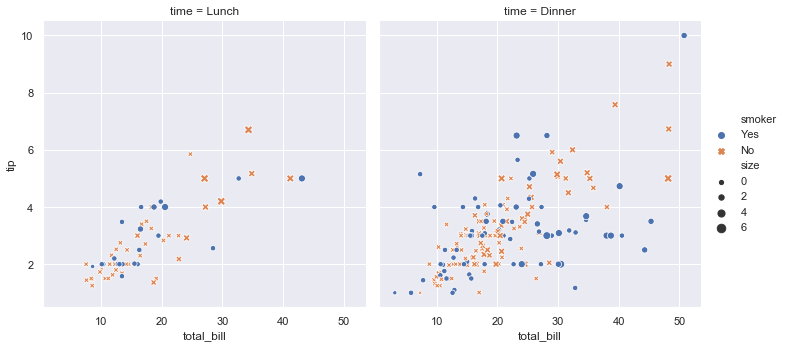

In [8]:
sns.set()
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

sns.set()表示使用那个默认的seaborn主题。

## 实践

这里记录一些自己平常用到的图形的绘制。

### 箱线图

可以在官方文档的Gallery中快速地找到相关示例，在此基础上进行修改即可。

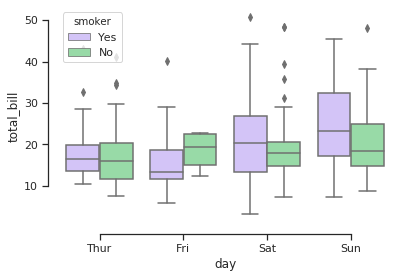

In [2]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

那么如何修改代码来定制图形呢？先来看看这段代码的输入是什么样的。然后再看看各个配置项是如何设置的。

### 时间序列图

绘制时间序列图。

/home/owen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


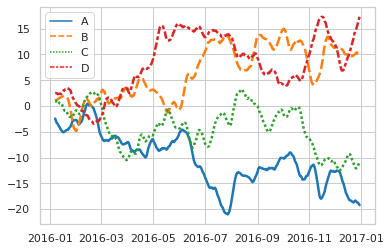

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)